Pt = Satellite Transmitter Power (in Decibel Watts, dBw) = 10 dBW
Gt = Satellite Antenna Gain (in Decibel Isotopic, dBi) = 9 dBi
Losses (in Decibels, db) = 19.43 db
ηR = Ground Station Antenna efficiency = 0.55
λ = c/f = Speed of Light/Carrier Frequency (in meters, m) =
0.136363636 m
kb = Boltzmann Constant (in Decibel Watts per degree Kelvin per
Hertz, dBW/K/Hz)= -228.6 dBW/K/Hz
TS = System Noise Temperature (in degrees Kelvin, K) = 22 K

TODO: dr = Ground Station Antenna Diameter (in meters, m)
TODO: R = Slant Range (in kilometers, km)

DSS24 = 34m
DSS34 = 34m
DSS54 = 34m
WPSA = 12m

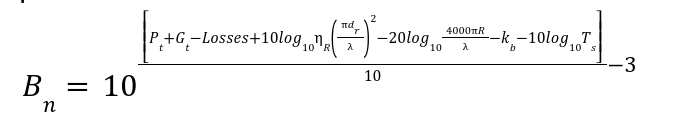

In [14]:
pt = 10
gt = 9
losses = 19.43
nr = 0.55
l = 0.136363636
kb = -228.6
ts = 22
dr = [34,34,34,12]

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

antennadf = pd.read_csv("./antenna_plot.csv", index_col=False)
satelitedf = pd.read_csv("./bonusdata.csv", index_col=False)
print(antennadf.shape, satelitedf.shape)

(51924, 5) (12981, 20)


In [16]:
antennadf.head()

,Antenna,Time (sec),X,Y,Z
0,DSS 24,0.000000,6132.732566,5437.728124,3689.829568
1,DSS 24,494.188833,5950.505743,5584.040250,3768.834568
2,DSS 24,554.188833,5928.055410,5601.314239,3778.567979
3,DSS 24,614.188833,5905.535950,5618.481001,3788.331360
4,DSS 24,674.188833,5882.947795,5635.540210,3798.124525


In [17]:
satelitedf.head()

,MISSION ELAPSED TIME (min),Rx(km)[J2000-EARTH],Ry(km)[J2000-EARTH],Rz(km)[J2000-EARTH],Vx(km/s)[J2000-EARTH],Vy(km/s)[J2000-EARTH],Vz(km/s)[J2000-EARTH],MASS (kg),EARTH Rx(km)[J2000-EARTH],EARTH Ry(km)[J2000-EARTH],EARTH Rz(km)[J2000-EARTH],EARTH Vx(km/s)[J2000-EARTH],EARTH Vy(km/s)[J2000-EARTH],EARTH Vz(km/s)[J2000-EARTH],MOON Rx(km)[J2000-EARTH],MOON Ry(km)[J2000-EARTH],MOON Rz(km)[J2000-EARTH],MOON Vx(km/s)[J2000-EARTH],MOON Vy(km/s)[J2000-EARTH],MOON Vz(km/s)[J2000-EARTH]
0,0.000000,3689.773564,4222.722170,3028.891599,-0.307917,0.268539,0.000720,4592.60000,0,0,0,0,0,0,-315259.8202,211922.4926,121411.1975,-0.632527,-0.667631,-0.346857
1,8.236481,2319.817224,4865.712767,3698.167005,-7.474524,2.142613,2.894977,60129.73972,0,0,0,0,0,0,-315572.1612,211592.3938,121239.6909,-0.631528,-0.668291,-0.347236
2,9.236481,1865.808701,4981.749611,3862.256016,-7.652172,1.724828,2.573246,60129.73972,0,0,0,0,0,0,-315610.0493,211552.2940,121218.8553,-0.631407,-0.668371,-0.347283
3,10.236481,1402.384261,5072.667625,4006.812686,-7.788451,1.305814,2.244322,60129.73972,0,0,0,0,0,0,-315647.9300,211512.1894,121198.0170,-0.631285,-0.668451,-0.347329
4,11.236481,932.010471,5138.480400,4131.480818,-7.883949,0.888450,1.910702,60129.73972,0,0,0,0,0,0,-315685.8035,211472.0799,121177.1759,-0.631164,-0.668531,-0.347375


In [18]:
slantdistance = []
X = []
Y = []
Z = []
for i in range(antennadf.shape[0]):
    satrow = satelitedf.iloc[i%12981][["Rx(km)[J2000-EARTH]","Ry(km)[J2000-EARTH]","Rz(km)[J2000-EARTH]"]]
    X.append(satrow["Rx(km)[J2000-EARTH]"])
    Y.append(satrow["Ry(km)[J2000-EARTH]"])
    Z.append(satrow["Rz(km)[J2000-EARTH]"])
    antrow = antennadf.iloc[i][["X","Y","Z"]]
    slantdistance.append(np.sqrt((antrow["X"]-satrow["Rx(km)[J2000-EARTH]"])**2 + (antrow["Y"]-satrow["Ry(km)[J2000-EARTH]"])**2 + (antrow["Z"]-satrow["Rz(km)[J2000-EARTH]"])**2))

In [19]:
slant_distance_df = pd.DataFrame()
slant_distance_df["Time (sec)"] = antennadf["Time (sec)"]
slant_distance_df["Slant Distance (km)"] = slantdistance
slant_distance_df["Antenna X"] = antennadf["X"]
slant_distance_df["Antenna Y"] = antennadf["Y"]
slant_distance_df["Antenna Z"] = antennadf["Z"]
slant_distance_df["Satelite X"] = X
slant_distance_df["Satelite Y"] = Y
slant_distance_df["Satelite Z"] = Z
slant_distance_df.to_csv("slant_distance_offnominal.csv", index=False)

slant_distance_df.head()

,Time (sec),Slant Distance (km),Antenna X,Antenna Y,Antenna Z,Satelite X,Satelite Y,Satelite Z
0,0.000000,2807.334528,6132.732566,5437.728124,3689.829568,3689.773564,4222.722170,3028.891599
1,494.188833,3701.741131,5950.505743,5584.040250,3768.834568,2319.817224,4865.712767,3698.167005
2,554.188833,4110.074493,5928.055410,5601.314239,3778.567979,1865.808701,4981.749611,3862.256016
3,614.188833,4541.367797,5905.535950,5618.481001,3788.331360,1402.384261,5072.667625,4006.812686
4,674.188833,4986.980576,5882.947795,5635.540210,3798.124525,932.010471,5138.480400,4131.480818


![image.png](attachment:image.png)

In [20]:
linkbudget = [[] for i in range(4)]
for i in range(antennadf.shape[0]):
    toppart = pt+gt-losses+10*np.log10(nr*((np.pi*dr[int(i/12981)]/l)**2))-20*np.log10(4000*np.pi*slantdistance[i]/l)-kb-10*np.log10(ts)
    exponent = (toppart/10)-3
    linkbudget[int(i/12981)].append(10**exponent)


# for i in range(len (linkbudget)):
#     if linkbudget[i] <10000:

In [21]:
antennae_names = ["DSS24", "DSS34", "DSS54", "WPSA"]

for i in range(4):
    link_budget_df = pd.DataFrame()
    link_budget_df["Time (sec)"] = antennadf["Time (sec)"].iloc[:12981]
    link_budget_df["Link Budget (kbps)"] = linkbudget[i]
    # print(antennadf.iloc[12981*i:12981*(i+1)]["X"])
    link_budget_df["Antenna X"] = antennadf["X"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Antenna Y"] = antennadf["Y"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Antenna Z"] = antennadf["Z"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Satelite X"] = X[12981*i:12981*(i+1)]
    link_budget_df["Satelite Y"] = Y[12981*i:12981*(i+1)]
    link_budget_df["Satelite Z"] = Z[12981*i:12981*(i+1)]
    link_budget_df["Slant Distance (km)"] = slantdistance[12981*i:12981*(i+1)]
    print(link_budget_df.head())
    link_budget_df.to_csv("link_budget_offnominal_"+antennae_names[i]+".csv", index=False)

# link_budget_df.head()

   Time (sec)  Link Budget (kbps)    Antenna X    Antenna Y    Antenna Z  \
0    0.000000        1.503798e+07  6132.732566  5437.728124  3689.829568   
1  494.188833        8.648997e+06  5950.505743  5584.040250  3768.834568   
2  554.188833        7.015821e+06  5928.055410  5601.314239  3778.567979   
3  614.188833        5.746515e+06  5905.535950  5618.481001  3788.331360   
4  674.188833        4.765435e+06  5882.947795  5635.540210  3798.124525   

    Satelite X   Satelite Y   Satelite Z  Slant Distance (km)  
0  3689.773564  4222.722170  3028.891599          2807.334528  
1  2319.817224  4865.712767  3698.167005          3701.741131  
2  1865.808701  4981.749611  3862.256016          4110.074493  
3  1402.384261  5072.667625  4006.812686          4541.367797  
4   932.010471  5138.480400  4131.480818          4986.980576  
   Time (sec)  Link Budget (kbps)    Antenna X    Antenna Y    Antenna Z  \
0    0.000000        2.284587e+06  5505.389605  6058.278337 -3694.999427   
1  494.

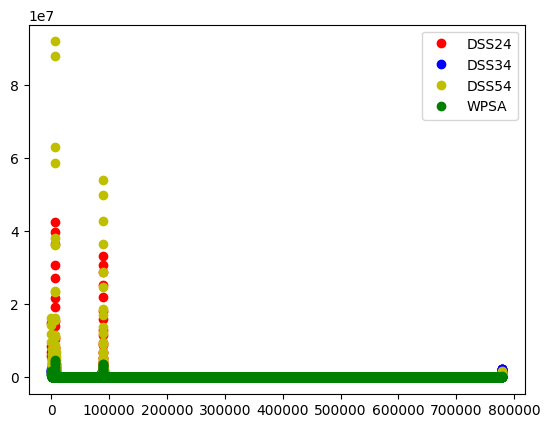

In [22]:
# plt.plot(antennadf["Time (sec)"])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[0], 'ro', label = antennae_names[0])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[1], 'bo', label = antennae_names[1])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[2], 'yo', label = antennae_names[2])
plt.plot(antennadf["Time (sec)"].iloc[:12981], linkbudget[3], 'go', label = antennae_names[3])
plt.legend()
plt.show()

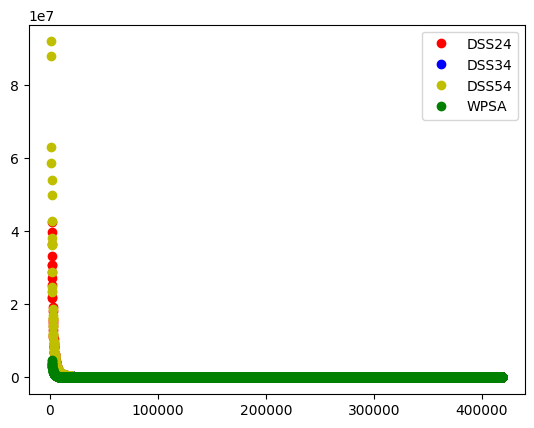

In [23]:
plt.plot(slantdistance[:12981], linkbudget[0], 'ro', label = antennae_names[0])
plt.plot(slantdistance[12981:12981*2], linkbudget[1], 'bo', label = antennae_names[1])
plt.plot(slantdistance[12981*2:12981*3], linkbudget[2], 'yo', label = antennae_names[2])
plt.plot(slantdistance[12981*3:12981*4], linkbudget[3], 'go', label = antennae_names[3])
plt.legend()
plt.show()

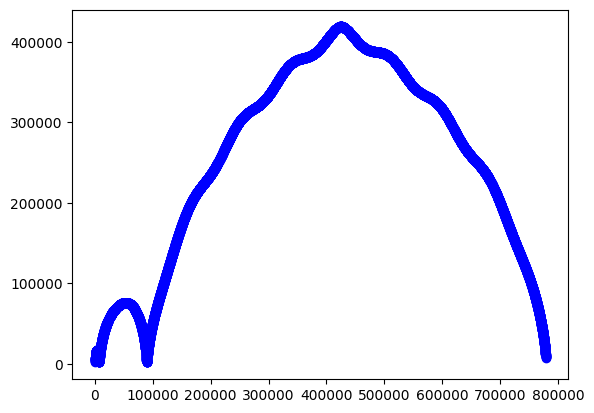

In [24]:
# plt.plot(antennadf["Time (sec)"])
plt.plot(antennadf["Time (sec)"].iloc[:12981], slantdistance[:12981], 'bo')
plt.show()